In [ ]:
! pip install feature_engine

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import missingno as msno
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [11]:
df_nl=pd.read_csv("/content/train.csv")

In [19]:
df_nl["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [49]:
df_nl.drop()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


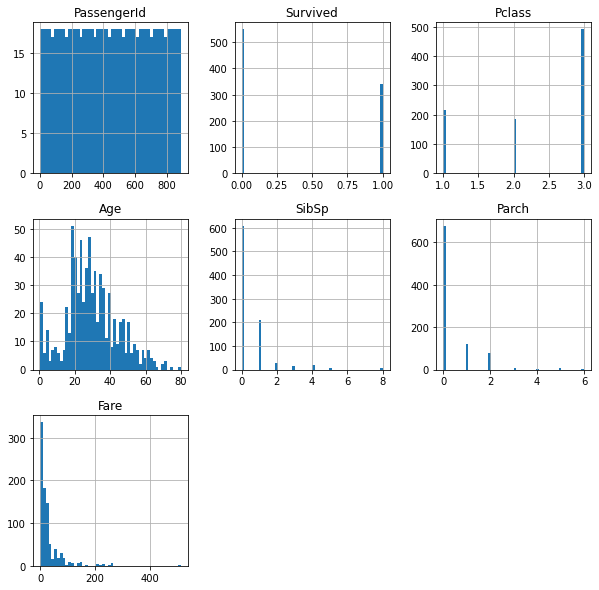

In [21]:
df_nl.hist(bins=50, figsize=(10,10))
plt.show()

In [23]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

In [36]:
imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=5),
    max_iter=10,
    random_state=0)

In [50]:
imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=100,
    random_state=0)

In [52]:
X_train_miss=imputer_missForest.fit_transform(df_nl[["Age"]])

In [53]:
X_train_miss = pd.DataFrame(X_train_miss, columns = ["Age"])


In [27]:
imputer_bayes.fit(df_nl[["Age"]])

IterativeImputer(estimator=BayesianRidge(), random_state=0)

In [38]:
X_train_knn = imputer_knn.fit_transform(df_nl[["Age"]])

In [28]:
X_train_bayes = imputer_bayes.transform(df_nl[["Age"]])


In [29]:
X_train_bayes = pd.DataFrame(X_train_bayes, columns = ["Age"])


In [39]:
X_train_knn = pd.DataFrame(X_train_knn, columns = ["Age"])


In [30]:
X_train_bayes.isnull().sum()

Age    0
dtype: int64

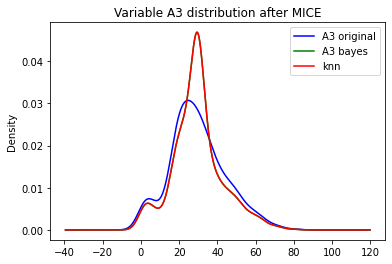

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_nl['Age'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['Age'].plot(kind='kde', ax=ax, color='Green')
X_train_miss['Age'].plot(kind='kde', ax=ax, color='Red')
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes','knn']
ax.legend(lines, labels, loc='best')
plt.title('Variable A3 distribution after MICE')
plt.show()